In [1]:
import sys
sys.path.insert(0, "./python/build/lib.macosx-11.1-arm64-cpython-39/")
import classy
print(classy.__file__)
from classy import Class

import os
import numpy as np
from numpy import sqrt as Sqrt
from numpy import cos as Cos
from numpy import sin as Sin
import matplotlib.pyplot as plt
import scipy as sp
from scipy import interpolate
import scipy.integrate as integrate
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy import optimize
import math
import matplotlib
from scipy.integrate import quad
from scipy.special import spherical_jn as j_ell
from scipy.interpolate import UnivariateSpline

# esthetic definitions for the plots
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]
matplotlib.rc('font',**{'family':'serif','serif':['Times New Roman']})
matplotlib.rc('text', usetex=True)

a_ini_over_a_today_default = 1e-14
start_large_k_at_tau_h_over_tau_k = 5e-7
start_small_k_at_tau_c_over_tau_h = 5e-7
P_k_max_inv_Mpc =10

z_max_pk = 1e6       # highest redshift involved
z_max_recfast = 1e6       # highest redshift involved
k_per_decade = 1000     # number of k values, controls final resolution
k_min_tau0 = 0.01       # this value controls the minimum k value in the figure (it is k_min * tau0)
P_k_max_inv_Mpc =25.0   # this value is directly the maximum k value in the figure in Mpc
tau_num_early = 500   # number of conformal time values before recombination, controls final resolution
tau_num_late = 1000     # number of conformal time values after recombination, controls final resolution

FidParams={'N_ur': 2.0328,'N_ncdm': 1,'m_ncdm': 0.06,'T_ncdm': 0.71611,
                 'output':'dTk,vTk', 
                        'z_max_pk':z_max_pk,
                        #'k_output_values':'0.0001,0.001,0.01,0.1,0.5',
                       #'thermo_z_initial':z_max_recfast+1.,
                       'k_per_decade_for_pk':k_per_decade,
                       'k_per_decade_for_bao':k_per_decade,
                       'k_min_tau0':k_min_tau0, # this value controls the minimum k value in the figure
                       'P_k_max_1/Mpc':P_k_max_inv_Mpc,
                        'modes':'s',
                        'P_k_max_1/Mpc':P_k_max_inv_Mpc,
                        'a_ini_over_a_today_default':a_ini_over_a_today_default,
                        'start_large_k_at_tau_h_over_tau_k':start_large_k_at_tau_h_over_tau_k,
                        'start_small_k_at_tau_c_over_tau_h':start_small_k_at_tau_c_over_tau_h,
#                         'perturbations_sampling_stepsize':0.001,
#                         'tol_perturbations_integration':1.e-6,
#                         'background_integration_stepsize':1.e-4,
                          'gauge':'synchronous'
          }

CMBParams={'N_ur': 2.0328,'N_ncdm': 1,'m_ncdm': 0.06,'T_ncdm': 0.71611,
                 'output':'tCl,pCl,lCl', 
           #'z_max_pk':1000,
                   'lensing':'yes',
                #'l_max_scalars': 7000,
           'k_output_values':'0.0001,0.001,0.01,0.1,0.5,10',
                   'non linear':'halofit',
           #'temperature_contributions': 'tsw',
#                    'k_per_decade_for_pk':k_per_decade,
#                        'k_per_decade_for_bao':k_per_decade,
#                         'tol_perturbations_integration':1.e-6,
#                         'background_integration_stepsize':1.e-3,
#                         'perturbations_sampling_stepsize':0.01,
#                         'tol_perturbations_integration':1.e-6,
#            #'P_k_max_1/Mpc':P_k_max_inv_Mpc,
#                          'start_large_k_at_tau_h_over_tau_k':start_large_k_at_tau_h_over_tau_k,
#                           'start_small_k_at_tau_c_over_tau_h':start_small_k_at_tau_c_over_tau_h,
#                           'gauge':'synchronous',
              #'l_switch_limber': 10000.,
                        'accurate_lensing':1,
#                     'num_mu_minus_lmax': 3000.,
#                     'delta_l_max': 1000.,
           'compute_damping_scale': 'yes'
          }


WZDR_settings = { 'rg_wzdr':1.14285714286,
                    'qsize_wzdr':10000,
                    'qmax_wzdr':200.,
                    'use_wzdr_PSD':'yes' 
                    }

Planck_bestfit_LCDM_settings = {'omega_b':0.02237,'omega_cdm':0.0,'omega_idm_wzdr':0.1200,'h':0.6736,
           'A_s':2.100e-09,'n_s':0.9649,'tau_reio':5.759502e-02,'Gamma_0_wzdr':1e-20,
                    'log10_zt_wzdr':4.5,'N_wzdr':0.5}

Planck_bestfit_LCDM_settings_WZDR = {'omega_b':0.02237,'omega_cdm':0.0,'omega_idm_wzdr':0.1200,'h':0.6736,
           'A_s':2.100e-09,'n_s':0.9649,'tau_reio':5.759502e-02,'Gamma_0_wzdr':5e-07,
                    'log10_zt_wzdr':4.5,'N_wzdr':0.5}

/Users/tsmith2/Dropbox/PC_GDM/temp/class_wzdr_corrected_ICs/./python/build/lib.macosx-11.1-arm64-cpython-39/classy.cpython-39-darwin.so


In [2]:
M_SPR = Class()
M_SPR.set(CMBParams)
M_SPR.set(WZDR_settings)
M_SPR.set(Planck_bestfit_LCDM_settings_WZDR)
M_SPR.compute()

In [6]:
one_k.keys()

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_wzdr', 'theta_wzdr', 'delta_idm_wzdr', 'theta_idm_wzdr', 'delta_cdm', 'theta_cdm', 'delta_ncdm[0]', 'theta_ncdm[0]', 'shear_ncdm[0]', 'cs2_ncdm[0]'])

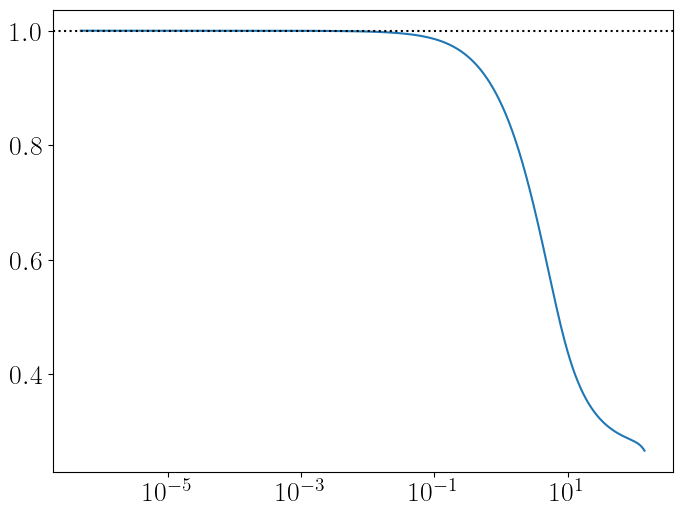

In [5]:
all_k = M_SPR.get_perturbations()  # this potentially constains scalars/tensors and all k values

Gamma_over_H_init = 1.349885e-01

one_k = all_k['scalar'][2] 
tau_k = one_k['tau [Mpc]']
delta_idm_wzdr = one_k['delta_idm_wzdr']

k=0.01

plt.semilogx(k*tau_k,delta_idm_wzdr/(-0.75*k**2*tau_k**2/3))


plt.axhline(y=1,ls=':',color='black')

#plt.loglog(k*tau_k,1/36*Gamma_over_H_init/(4+Gamma_over_H_init)*k**4*tau_k**3,ls='--')


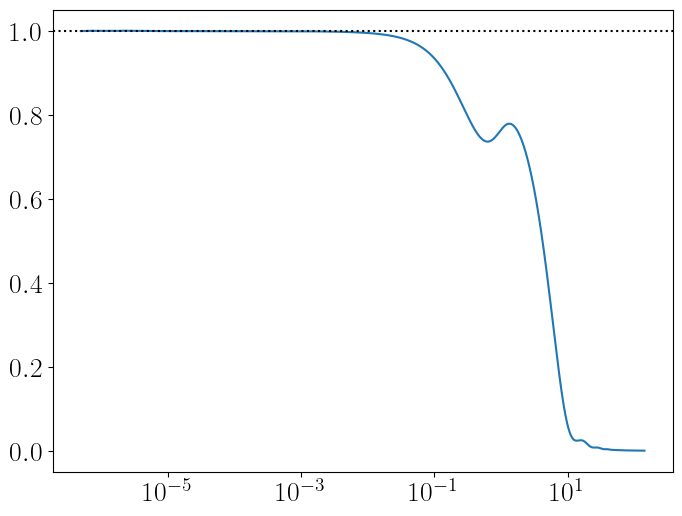

In [4]:
all_k = M_SPR.get_perturbations()  # this potentially constains scalars/tensors and all k values

Gamma_over_H_init = 1.349885e-01

one_k = all_k['scalar'][2] 
tau_k = one_k['tau [Mpc]']
theta_wzdr = one_k['theta_wzdr']

k=0.01

plt.semilogx(k*tau_k,-theta_wzdr/(1/36*k**4*tau_k**3))


plt.axhline(y=1,ls=':',color='black')

#plt.loglog(k*tau_k,1/36*Gamma_over_H_init/(4+Gamma_over_H_init)*k**4*tau_k**3,ls='--')


In [ ]:
init_theta_idm_wzdr=-1.094670e-17 at k=1.483455e-01

In [11]:
k=1.483455e-01
1/36*Gamma_over_H_init/(4+Gamma_over_H_init)*k**4*(2.891220e-04)**3

1.0946704974537121e-17

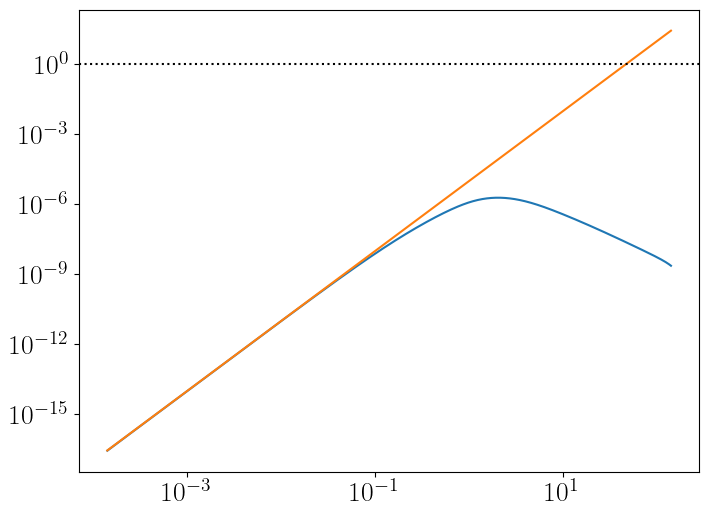

In [7]:
all_k = M_SPR.get_perturbations()  # this potentially constains scalars/tensors and all k values

Gamma_over_H_init = 1.393733e-01

one_k = all_k['scalar'][2] 
tau_k = one_k['tau [Mpc]']
theta_idm_wzdr = one_k['theta_idm_wzdr']

k=0.01

plt.loglog(k*tau_k,-theta_idm_wzdr)
plt.loglog(k*tau_k,(1/36*Gamma_over_H_init/(4+Gamma_over_H_init)*k**4*tau_k**3))


plt.axhline(y=1,ls=':',color='black')

#plt.loglog(k*tau_k,1/36*Gamma_over_H_init/(4+Gamma_over_H_init)*k**4*tau_k**3,ls='--')


In [ ]:
M_LCDM = Class()
M_LCDM.set(FidParams)
M_LCDM.set(WZDR_settings)
#M_LCDM.set({'log10_zt_wzdr':3.5})
M_LCDM.set(Planck_bestfit_LCDM_settings)
M_LCDM.compute()

M_SPR = Class()
M_SPR.set(FidParams)
M_SPR.set(WZDR_settings)
#M_SPR.set({'log10_zt_wzdr':3.5})
M_SPR.set(Planck_bestfit_LCDM_settings_WZDR)
M_SPR.compute()

In [ ]:
M_LCDM_SW = Class()
M_LCDM_SW.set(CMBParams)
M_LCDM_SW.set(WZDR_settings)
M_LCDM_SW.set(Planck_bestfit_LCDM_settings)
M_LCDM_SW.compute()

M_SPR_SW = Class()
M_SPR_SW.set(CMBParams)
M_SPR_SW.set(WZDR_settings)
M_SPR_SW.set(Planck_bestfit_LCDM_settings_WZDR)
M_SPR_SW.compute()

background = M_LCDM_SW.get_background() # load background table

background_tau = background['conf. time [Mpc]'] # read conformal times in background table
background_z = background['z'] # read redshift
background_z_at_tau = interp1d(background_tau,background_z)

thermo = M_LCDM_SW.get_thermodynamics()
thermo_tau = thermo['conf. time [Mpc]']

vis_interp = interp1d(thermo['conf. time [Mpc]'],thermo['g [Mpc^-1]'])

kD = interp1d(thermo_tau,2*np.pi/thermo['r_d'],fill_value="extrapolate")

rs = background['comov.snd.hrz.']
rs_dot = np.diff(rs)/np.diff(background_tau)
rs_interp = interp1d(background_tau,rs)
rs_dot_interp = interp1d(background_tau[1:],rs_dot)

In [ ]:
all_k = M_SPR_SW.get_perturbations()  # this potentially constains scalars/tensors and all k values

one_k = all_k['scalar'][2] 
tau_k = one_k['tau [Mpc]']


In [5]:
M_SPR_SW.get_current_derived_parameters(['sigma8'])['sigma8']

0.7536319422761001

In [ ]:
Cls_LCDM = M_LCDM_SW.raw_cl(6000)
ll = Cls_LCDM['ell'][2:]
ClTT_LCDM = Cls_LCDM['tt'][2:]
ClEE_LCDM = Cls_LCDM['ee'][2:]
ClTE_LCDM = Cls_LCDM['te'][2:]

Cls_SPR = M_SPR_SW.raw_cl(6000)
ClTT_SPR = Cls_SPR['tt'][2:]
ClEE_SPR = Cls_SPR['ee'][2:]
ClTE_SPR = Cls_SPR['te'][2:]

kvec = np.logspace(-3,np.log10(P_k_max_inv_Mpc),1000) # array of kvec in h/Mpc

pkM_LCDM = []
pkM_SPR = []

h=M_LCDM_SW.h()
khvec = kvec*h
for kh in khvec:
    pkM_LCDM.append(M_LCDM_SW.pk_lin(kh,0)*h**3)
    

h=M_SPR_SW.h()
khvec = kvec*h
for kh in khvec:
    pkM_SPR.append(M_SPR_SW.pk_lin(kh,0)*h**3)

# np.savetxt('/Users/tsmith2/Dropbox/NSF_AAG_2022/tristan/LCDM_Cl.dat',np.column_stack((ll,ClTT_LCDM,
#                                                                                              ClEE_LCDM,ClTE_LCDM)))

# np.savetxt('/Users/tsmith2/Dropbox/NSF_AAG_2022/tristan/weak_Cl.dat',np.column_stack((ll,ClTT_SPR,
#                                                                                              ClEE_SPR,ClTE_SPR)))

# np.savetxt('/Users/tsmith2/Dropbox/NSF_AAG_2022/tristan/weak_Pk.dat',np.column_stack((kvec,pkM_SPR)))
# np.savetxt('/Users/tsmith2/Dropbox/NSF_AAG_2022/tristan/weak_LCDM_Pk.dat',np.column_stack((kvec,pkM_LCDM)))


In [ ]:
plt.semilogx(ll,ll**2*ClTT_LCDM)
plt.semilogx(ll,ll**2*ClTT_SPR)

In [5]:
background = M_LCDM.get_background() # load background table

background_tau = background['conf. time [Mpc]'] # read conformal times in background table
background_z = background['z'] # read redshift
background_tau_at_z = interp1d(background_z,background_tau)
background_z_at_tau = interp1d(background_tau,background_z)

tau_ini = background_tau_at_z(z_max_pk)

times = M_LCDM.get_current_derived_parameters(['tau_rec','conformal_age'])
tau_rec=times['tau_rec']
a_rec = 1/(background_z_at_tau(tau_rec)+1)
tau_0 = times['conformal_age']
tau1 = np.logspace(math.log10(tau_ini),math.log10(tau_rec),tau_num_early)
tau2 = np.logspace(math.log10(tau_rec),math.log10(tau_0),tau_num_late)[1:]
tau2[-1]=tau_0
tau2[-1] *= 0.999999 # this tiny shift avoids interpolation errors
tau= np.concatenate((tau1,tau2))
tau_num = len(tau)

a_tau = 1/(1+background_z_at_tau(tau))

one_time = M_LCDM.get_transfer(background_z_at_tau(tau[0]))
k = one_time['k (h/Mpc)']
k_num = len(k)

T_phi_LCDM = np.zeros((tau_num,k_num))
T_psi_LCDM = np.zeros((tau_num,k_num))
T_weyl_LCDM = np.zeros((tau_num,k_num))
T_cdm_LCDM = np.zeros((tau_num,k_num))

for i in range(tau_num):
    
    one_time = M_LCDM.get_transfer(background_z_at_tau(tau[i])) # transfer functions at each time tau 

    T_phi_LCDM[i,:] = one_time['phi']
    T_psi_LCDM[i,:] = one_time['psi']
    T_weyl_LCDM[i,:] = (one_time['phi']+one_time['psi'])/2
    T_cdm_LCDM[i,:] = one_time['d_cdm']

T_phi_interp_LCDM = interpolate.interp2d(k,a_tau, T_phi_LCDM, kind='cubic')
T_psi_interp_LCDM = interpolate.interp2d(k,a_tau, T_psi_LCDM, kind='cubic')
T_cdm_interp_LCDM = interpolate.interp2d(k,a_tau, T_cdm_LCDM, kind='cubic')
T_SW_interp_LCDM = interpolate.interp2d(k,a_tau, T_SW_LCDM, kind='cubic')

##############
##############

background = M_SPR.get_background() # load background table

background_tau = background['conf. time [Mpc]'] # read conformal times in background table
background_z = background['z'] # read redshift
background_tau_at_z = interp1d(background_z,background_tau)
background_z_at_tau = interp1d(background_tau,background_z)

tau_ini = background_tau_at_z(z_max_pk)

times = M_SPR.get_current_derived_parameters(['tau_rec','conformal_age'])
tau_rec=times['tau_rec']
tau_0 = times['conformal_age']
tau1 = np.logspace(math.log10(tau_ini),math.log10(tau_rec),tau_num_early)
tau2 = np.logspace(math.log10(tau_rec),math.log10(tau_0),tau_num_late)[1:]
tau2[-1]=tau_0
tau2[-1] *= 0.999999 # this tiny shift avoids interpolation errors
tau= np.concatenate((tau1,tau2))
tau_num = len(tau)

a_tau = 1/(1+background_z_at_tau(tau))

one_time = M_SPR.get_transfer(background_z_at_tau(tau[0]))
k = one_time['k (h/Mpc)']
k_num = len(k)

T_phi_SPR = np.zeros((tau_num,k_num))
T_psi_SPR = np.zeros((tau_num,k_num))
T_weyl_SPR = np.zeros((tau_num,k_num))
T_cdm_SPR = np.zeros((tau_num,k_num))
T_SW_SPR = np.zeros((tau_num,k_num))

for i in range(tau_num):
    
    one_time = M_SPR.get_transfer(background_z_at_tau(tau[i])) # transfer functions at each time tau 

    T_phi_SPR[i,:] = one_time['phi']
    T_psi_SPR[i,:] = one_time['psi']
    T_weyl_SPR[i,:] = (one_time['phi']+one_time['psi'])/2
    T_cdm_SPR[i,:] = one_time['d_idm_wzdr']

T_phi_interp_SPR = interpolate.interp2d(k,a_tau, T_phi_SPR, kind='cubic')
T_psi_interp_SPR = interpolate.interp2d(k,a_tau, T_psi_SPR, kind='cubic')
T_cdm_interp_SPR = interpolate.interp2d(k,a_tau, T_cdm_SPR, kind='cubic')

tau_list = tau
k_list = k
a_list = a_tau

In [8]:
T_weyl_LCDM = (T_phi_LCDM+T_psi_LCDM)/2
T_weyl_SPR = (T_phi_SPR+T_psi_SPR)/2

h=M_LCDM.h()
a_rec = 1/(background_z_at_tau(tau_rec)+1)
tau_rec_ind = np.abs(tau_list-tau_rec).argmin()
SW_INIT=-1

In [125]:
# In case the kernel fails, save output so you can read it back in
np.savetxt('./k_values.dat',k_list)
np.savetxt('./T_phi_LCDM.dat', T_phi_LCDM.ravel())
np.savetxt('./T_psi_LCDM.dat',T_psi_LCDM.ravel())
np.savetxt('./T_SW_LCDM.dat',T_SW_LCDM.ravel())
np.savetxt('./T_phi_SPR.dat', T_phi_SPR.ravel())
np.savetxt('./T_psi_SPR.dat',T_psi_SPR.ravel())
np.savetxt('./T_SW_SPR.dat',T_SW_SPR.ravel())
np.savetxt('./tau_a_rs_list.dat', np.column_stack([tau_list,a_list,rs_interp(tau_list)]))

In [64]:
k_list = np.genfromtxt('./k_values.dat')
tau_a_rs_list = np.genfromtxt('./tau_a_rs_list.dat')
tau_list = tau_a_rs_list[:,0]
a_list = tau_a_rs_list[:,1]
rs_list = tau_a_rs_list[:,2]

background_tau_at_z = interp1d(1/a_list-1,tau_list)

T_phi_LCDM = np.genfromtxt("./T_phi_LCDM.dat")
T_phi_LCDM = T_phi_LCDM.reshape(*(len(tau_list),len(k_list)))

T_psi_LCDM = np.genfromtxt("./T_psi_LCDM.dat")
T_psi_LCDM = T_psi_LCDM.reshape(*(len(tau_list),len(k_list)))

T_phi_SPR = np.genfromtxt("./T_phi_SPR.dat")
T_phi_SPR = T_phi_SPR.reshape(*(len(tau_list),len(k_list)))

T_psi_SPR = np.genfromtxt("./T_psi_SPR.dat")
T_psi_SPR = T_psi_SPR.reshape(*(len(tau_list),len(k_list)))

T_weyl_LCDM = (T_phi_LCDM+T_psi_LCDM)/2
T_weyl_SPR = (T_phi_SPR+T_psi_SPR)/2

tau_rec_ind = np.abs(tau_list-tau_rec).argmin()

In [154]:
fac=0.5
p=2
SW_INIT=-1

SW_LCDM_1 = np.zeros(len(k_list))
SW_LCDM_2 = np.zeros(len(k_list))
SW_LCDM_3 = np.zeros(len(k_list))
SW_LCDM_4 = np.zeros(len(k_list))

SW_SPR_1 = np.zeros(len(k_list))
SW_SPR_2 = np.zeros(len(k_list))
SW_SPR_3 = np.zeros(len(k_list))
SW_SPR_4 = np.zeros(len(k_list))

for ii,k in enumerate(k_list):
    k = k*h
    
    integrand= 2*T_weyl_LCDM[:tau_rec_ind,ii]*np.sin(k*(rs_interp(tau_rec)-rs_interp(tau_list[:tau_rec_ind])))
    
    SW_LCDM_1[ii]=SW_INIT*np.cos(k*rs_interp(tau_rec))*np.exp(-fac*k**p/kD(tau_rec)**p)
    SW_LCDM_2[ii]=-k/np.sqrt(3)*integrate.simpson(integrand,tau_list[:tau_rec_ind])*np.exp(-fac*k**p/kD(tau_rec)**p)
    SW_LCDM_3[ii]=T_phi_LCDM[tau_rec_ind,ii]*np.exp(-fac*k**p/kD(tau_rec)**p)
    SW_LCDM_4[ii]=T_psi_LCDM[tau_rec_ind,ii]
    
    integrand= 2*T_weyl_SPR[:tau_rec_ind,ii]*np.sin(k*(rs_interp(tau_rec)-rs_interp(tau_list[:tau_rec_ind])))
    
    SW_SPR_1[ii]=SW_INIT*np.cos(k*rs_interp(tau_rec))*np.exp(-fac*k**p/kD(tau_rec)**p)
    SW_SPR_2[ii]=-k/np.sqrt(3)*integrate.simpson(integrand,tau_list[:tau_rec_ind])*np.exp(-fac*k**p/kD(tau_rec)**p)
    SW_SPR_3[ii]=T_phi_SPR[tau_rec_ind,ii]*np.exp(-fac*k**p/kD(tau_rec)**p)
    SW_SPR_4[ii]=T_psi_SPR[tau_rec_ind,ii]

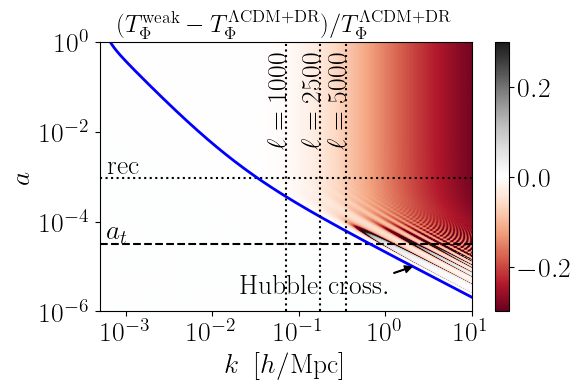

In [151]:
from matplotlib.gridspec import GridSpec
# esthetic definitions for the plots
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [4.0,8.0]

a_label_Hubble = 10**(-5) # value of time at which we want to place the label on Hubble crossing
a_label_ks = 5e-5     # value of time at which we want to place the label on sound horizon crossing
#
# reshaping of (k,tau) necessary to call the function 'pcolormesh'
#
K,A = np.meshgrid(k_list,a_list)
#
# inform user of the size of the grids (related to the figure resolution)
#
#print ('grid size:',len(k),len(tau),Theta0.shape)
#
#################
#
# start plotting
#
#################
#
fig = plt.figure(figsize=(6,3.5)) 

gs=GridSpec(1,1) # 1 rows, 1 columns

ax1=fig.add_subplot(gs[0,0]) 

fig_Theta = ax1.pcolormesh(K,A,T_weyl_SPR/T_weyl_LCDM-1,cmap='RdGy',vmin=-0.3,vmax=0.3,shading='gouraud')

ax1.axhline(y=a_rec,color='k',linestyle=':')
#ax1.axhline(y=1/(1+z_idm_dec1),color='k',linestyle='--')
zt_wzdr=10**Planck_bestfit_LCDM_settings_WZDR['log10_zt_wzdr']
ax1.axhline(y=1/(1+zt_wzdr),color='k',linestyle='--')
#ax1.axhline(y=a_eq,color='k',linestyle=':')
#ax1.axhline(y=a_lambda,color='k',linestyle=':')

ax1.text(6e-4,1.3*a_rec,r'$\mathrm{rec}$')
#ax1.text(6e-4,0.35*1/(1+z_idm_dec1),r'$\mathrm{idm-dec}$')
ax1.text(6e-4,1.3*1/(1+zt_wzdr),r'$a_t$')

#ax1.text(6e-4,0.3*a_eq,r'$\mathrm{R/M} \,\, \mathrm{eq.}$')
#ax1.text(6e-4,0.75*a_lambda,r'$\mathrm{M/L} \,\, \mathrm{eq.}$')

ax1.plot(2*np.pi/h*1/tau_list,a_list,'b-',linewidth=2)
#ax1.plot(2*np.pi/M_SPR.h()*1/tau,a_tau,'b--',linewidth=2)

#ax1.axvline(x=2/(background_tau[-1]*0.7195363),color='k',linestyle=':')
ax1.axvline(x=2500/(tau_list[-1]),color='k',linestyle=':')
ax1.text(0.6*2500/(tau_list[-1]),0.05,r'$\ell=2500$',rotation=90, va='center')
ax1.axvline(x=5000/(tau_list[-1]),color='k',linestyle=':')
ax1.text(0.6*5000/(tau_list[-1]),0.05,r'$\ell=5000$',rotation=90, va='center')
ax1.axvline(x=1000/(tau_list[-1]),color='k',linestyle=':')
ax1.text(0.6*1000/(tau_list[-1]),0.05,r'$\ell=1000$',rotation=90, va='center')

ax1.annotate(r'$\mathrm{Hubble} \,\, \mathrm{cross.}$',
                  xy=(2*np.pi/h*1/background_tau_at_z(1/a_label_Hubble-1),a_label_Hubble),
                  xytext=(0.01*2*np.pi/h*1/background_tau_at_z(1/a_label_Hubble-1),0.25*a_label_Hubble),
                  arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headlength=5, headwidth=5))
#
ax1.set_xlim(5e-4,10)
ax1.set_ylim(1,1e-6)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$k  \,\,\, [h/{\rm Mpc}]$')
ax1.set_ylabel(r'$a$')
ax1.invert_yaxis()
#
# color legend
#
fig.colorbar(fig_Theta)

ax1.set_title(r'$(T_\Phi^{\rm weak} -T_\Phi^{\Lambda{\rm CDM}+{\rm DR}})/T_\Phi^{\Lambda{\rm CDM}+{\rm DR}}$',y=1.01,
              fontsize=18)

ax1.set_xticks([1e-3,1e-2,1e-1,1,1e1])

plt.savefig('weak_Weyl_2D.png',bbox_inches = "tight")
plt.show()

Text(0.5, 0, '$k\\ [h{\\rm Mpc}^{-1}]$')

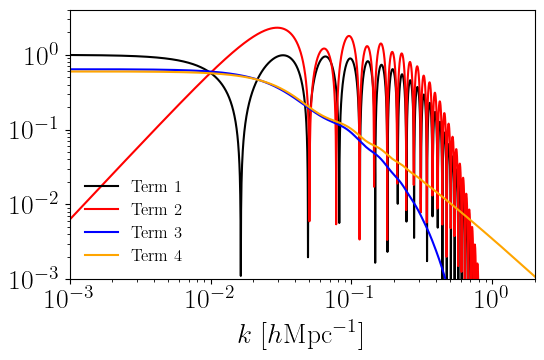

In [127]:
# Each of the terms in the solution for delta_gamma

fig = plt.figure(figsize=(6,3.5)) 

plt.loglog(k_list, np.abs(SW_LCDM_1),color='k', label='Term 1')
plt.loglog(k_list, np.abs(SW_LCDM_2),color='r', label='Term 2')
plt.loglog(k_list, np.abs(SW_LCDM_3),color='b', label='Term 3')
plt.loglog(k_list, np.abs(SW_LCDM_4),color='orange', label='Term 4')
plt.xlim([1e-3,2])
plt.ylim([1e-3,4])

plt.legend(loc='lower left',frameon=False,fontsize=12)

plt.xlabel(r'$k\ [h{\rm Mpc}^{-1}]$')

#plt.savefig('SW_terms.pdf',bbox_inches = "tight")

(0.01, 2)

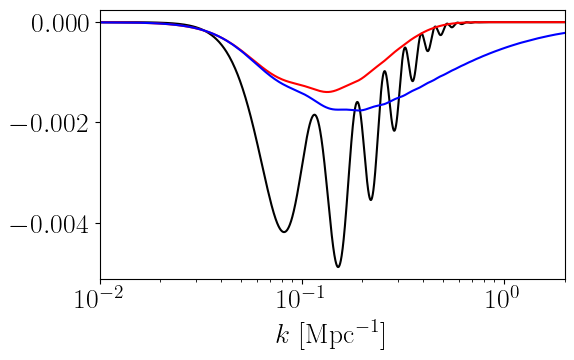

In [157]:
# Take the difference between the terms-- can't do fractional change because 
# denominator goes through zero. 
fig = plt.figure(figsize=(6,3.5)) 

plt.semilogx(k_list, -(SW_SPR_2-SW_LCDM_2),color='k')
plt.semilogx(k_list, SW_SPR_3-SW_LCDM_3,color='r')
plt.semilogx(k_list, SW_SPR_4-SW_LCDM_4,color='b')

plt.xlabel(r'$k\ [{\rm Mpc}^{-1}]$',fontsize=20)

plt.xlim([1e-2,2])

In [145]:
# We can also compute the Cls

def dimen_P_prim(k,A_s,n_s,kp=0.05):
    return A_s*(k/kp)**(n_s-1)

def ClTT_LCDM(ell):
    
#     k_min = ell/(tau_0-tau_rec)/5
#     k_max = ell/(tau_0-tau_rec)*5
    k_int_list = k_list*h #np.linspace(k_min,k_max,1000)
    
    temp_list=np.zeros(len(k_int_list))

    for ii,k in enumerate(k_int_list):
        temp_list[ii] = dimen_P_prim(k,A_s,n_s)/k*(SW_LCDM[ii]*j_ell(ell,k*(tau_0-tau_rec)))**2
    
    return integrate.simpson(temp_list,k_int_list)

def ClTT_SPR(ell):
#     k_min = ell/(tau_0-tau_rec)/5
#     k_max = ell/(tau_0-tau_rec)*5
    k_int_list = k_list*h #np.linspace(k_min,k_max,1000)
    
    temp_list=np.zeros(len(k_int_list))
    for ii,k in enumerate(k_int_list):
        temp_list[ii] = dimen_P_prim(k,A_s,n_s)/k*(SW_SPR[ii]*j_ell(ell,k*(tau_0-tau_rec)))**2
        
    return integrate.simpson(temp_list,k_int_list)

In [146]:
A_s=2.100e-09
n_s=0.9649

ell_list= np.sort(np.concatenate((np.linspace(2,250,50),np.logspace(2,np.log10(6000),1000)))) 

ClTT_LCDM_list = np.zeros(len(ell_list))
ClTT_SPR_list = np.zeros(len(ell_list))

for ii,ell in enumerate(ell_list):
    
    ClTT_LCDM_list[ii] = ClTT_LCDM(math.ceil(ell))
    ClTT_SPR_list[ii] = ClTT_SPR(math.ceil(ell))

    ell_list[ii] = math.ceil(ell)

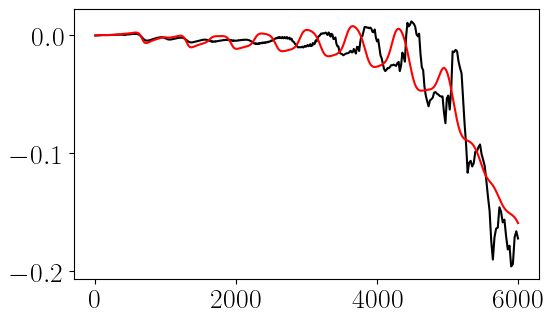

In [150]:
# Difference between the Cls! 
fig = plt.figure(figsize=(6,3.5)) 
plt.plot(ell_list,ClTT_SPR_list/ClTT_LCDM_list-1,color='k')
plt.plot(ll,ClTT_SPR_out/ClTT_LCDM_out-1,color='r')